# Spam Detector

In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Models will be:
# 1. Linear Regression 
# 2. Random Forest Model
# Prediction Random Forest Model will perform better

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [146]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [147]:
# Create the labels set `y` and features DataFrame `X`
X = data.copy()
X = X.drop("spam", axis=1)
display(X.head())

y = data["spam"].values
display(y[0:5])

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


array([1, 1, 1, 1, 1])

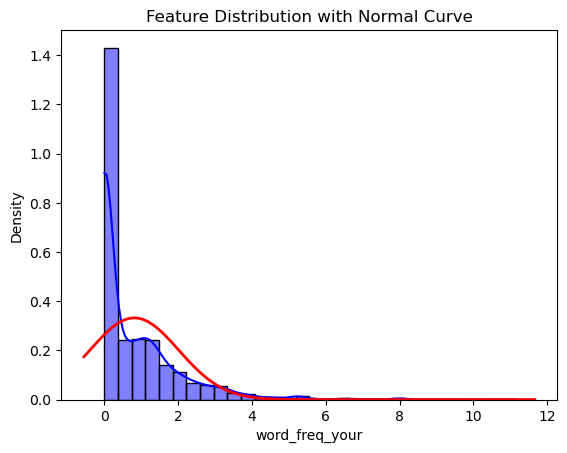

In [171]:
# [Optional] Is X columns linear:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
# Determine if the data is a Gaussian distribution: If the KDE (blue) curve closely 
# #matches the red normal distribution curve, the data is most likely normal

# StandardScaler Preprocessor Standardization may behave badly if the individual 
# features do not more or less look like standard normally distributed data
# Gaussian

# Choose a specific column from X or y
feature_to_plot = X.iloc[:, 0]  # Replace with specific feature column if needed

# Plot the histogram with KDE
sns.histplot(feature_to_plot, kde=True, stat="density", color="blue", bins=30)
# Overlay a normal distribution
mean, std = feature_to_plot.mean(), feature_to_plot.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title('Feature Distribution with Normal Curve')
plt.show()

In [148]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
pd.DataFrame(y).value_counts()

0
0    2788
1    1813
Name: count, dtype: int64

In [149]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
4576,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.131,0.000,0.0,0.000,0.0,1.488,5,64
4401,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,1.571,5,11
3707,0.17,0.0,0.17,0.0,0.00,0.0,0.0,0.0,0.8,0.0,...,0.0,0.253,0.168,0.084,0.0,0.024,0.0,4.665,81,1031
2362,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,4.228,53,148
1537,0.00,0.0,0.00,0.0,2.17,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.000,0.000,0.0,0.000,0.0,1.333,5,16


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [150]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance
X_scaler = StandardScaler()

In [151]:
# Fit the Standard Scaler with the training data
X_scaler.fit(X_train)

StandardScaler()

In [152]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. Use a `random_state` of `1`. 

In [153]:
# Create and fit a Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=1)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [154]:
# Make and save testing predictions with the trained Logistic Regression model using the test data
lr_predictions = lr_model.predict(X_test_scaled)
# Review the predictions
lr_predictions

array([0, 0, 1, ..., 0, 0, 1])

In [155]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
print('Testing Data Score: %.3f' % lr_model.score(X_test_scaled, y_test))
print('Accuracy Score: %.3f' % accuracy_score(y_test, lr_predictions))

Testing Data Score: 0.928
Accuracy Score: 0.928


In [167]:
# [Optional] Make predictions with just Feature Importances:
# Create the labels set `y` and features DataFrame `X`
X2 = data[feature_names]
display(X2.head())

y = data["spam"].values
display(y[0:5])

# Resplit the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=1)
X2_train.head()

# Fit Transform: 
x2_scaler = StandardScaler().fit(X2_train)
X2_train_scaled = x2_scaler.transform(X2_train)
X2_test_scaled = x2_scaler.transform(X2_test)

# Create LR Model
lr2_model = LogisticRegression(random_state=1)
lr2_model.fit(X2_train_scaled, y2_train)

# Make and save testing predictions with the trained Logistic Regression model using the test data
lr2_predictions = lr2_model.predict(X2_test_scaled)
# Review the predictions
lr2_predictions

# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
print('Testing Data Score: %.3f' % lr2_model.score(X2_test_scaled, y2_test))
print('Accuracy Score: %.3f' % accuracy_score(y2_test, lr2_predictions))

,word_freq_your,word_freq_you,word_freq_will,word_freq_telnet,word_freq_technology,word_freq_table,word_freq_report,word_freq_remove,word_freq_receive,word_freq_re,...,word_freq_000,char_freq_[,char_freq_;,char_freq_(,char_freq_$,char_freq_#,char_freq_!,capital_run_length_total,capital_run_length_longest,capital_run_length_average
0,0.96,1.93,0.64,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.000,0.000,0.000,0.778,278,61,3.756
1,1.59,3.47,0.79,0.0,0.0,0.0,0.21,0.21,0.21,0.00,...,0.43,0.0,0.00,0.132,0.180,0.048,0.372,1028,101,5.114
2,0.51,1.36,0.45,0.0,0.0,0.0,0.00,0.19,0.38,0.06,...,1.16,0.0,0.01,0.143,0.184,0.010,0.276,2259,485,9.821
3,0.31,3.18,0.31,0.0,0.0,0.0,0.00,0.31,0.31,0.00,...,0.00,0.0,0.00,0.137,0.000,0.000,0.137,191,40,3.537
4,0.31,3.18,0.31,0.0,0.0,0.0,0.00,0.31,0.31,0.00,...,0.00,0.0,0.00,0.135,0.000,0.000,0.135,191,40,3.537


array([1, 1, 1, 1, 1])

Testing Data Score: 0.928
Accuracy Score: 0.928


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. Use a `random_state` of `1`. 

In [141]:
# Create and fit a Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state=1).fit(X_train_scaled, y_train)
rfc_model

RandomForestClassifier(random_state=1)

In [142]:
# Make and save testing predictions with the trained Random Forest Classifier model using the test data
rfc_predict = rfc_model.predict(X_test_scaled)

# Review the predictions
rfc_predict

array([1, 1, 1, ..., 1, 0, 1])

In [143]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
print('Test Accuracy: %.3f' % rfc_model.score(X_test_scaled, y_test))
print('Accuracy Score: %.3f' % accuracy_score(y_test, rfc_predict))

Test Accuracy: 0.967
Accuracy Score: 0.967


In [162]:
# [Optional] Identify important features
# Which column (X) is most important in 
# determining the mail type (Spam, Not Spam)
feature_importances = rfc_model.feature_importances_
feature_importances_sorted = sorted(zip(X.columns, feature_importances), reverse=True)
feature_importances_sorted[:10]

# Extracting only the names
feature_names = [name for name, _ in feature_importances_sorted]

print(feature_names)

['word_freq_your', 'word_freq_you', 'word_freq_will', 'word_freq_telnet', 'word_freq_technology', 'word_freq_table', 'word_freq_report', 'word_freq_remove', 'word_freq_receive', 'word_freq_re', 'word_freq_project', 'word_freq_pm', 'word_freq_people', 'word_freq_parts', 'word_freq_over', 'word_freq_our', 'word_freq_original', 'word_freq_order', 'word_freq_money', 'word_freq_meeting', 'word_freq_make', 'word_freq_mail', 'word_freq_labs', 'word_freq_lab', 'word_freq_internet', 'word_freq_hpl', 'word_freq_hp', 'word_freq_george', 'word_freq_free', 'word_freq_font', 'word_freq_email', 'word_freq_edu', 'word_freq_direct', 'word_freq_data', 'word_freq_cs', 'word_freq_credit', 'word_freq_conference', 'word_freq_business', 'word_freq_all', 'word_freq_addresses', 'word_freq_address', 'word_freq_857', 'word_freq_85', 'word_freq_650', 'word_freq_415', 'word_freq_3d', 'word_freq_1999', 'word_freq_000', 'char_freq_[', 'char_freq_;', 'char_freq_(', 'char_freq_$', 'char_freq_#', 'char_freq_!', 'capita

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*

After plotting the X values and determining the dataset was Not a natural (Gaussian) distribution, I guessed the Random Forest model would perform better.  

Although both models can work with nonlinear data, Logistic Regression assumes a linear relationship between features and the target variable. Logistic Regression models the features and target as a linear combination, which assumes that each feature has an additive and proportional effect on the log-odds of the target. However, if the relationship is nonlinear, this assumption fails to capture the underlying patterns accurately.

On the other hand, the Random Forest model handles nonlinear relationships naturally. Random Forest does not assume any specific relationship (linear or otherwise) between features and the target. Instead, it is an ensemble model consisting of multiple decision trees, each trained on random subsets of the data and features. At each split in a decision tree, it evaluates various thresholds to determine which feature and value provide the best separation of the data. This hierarchical, threshold-based approach allows Random Forest to model complex, nonlinear relationships effectively.


*Results:*
The accuracy scores of both models support the hypothesis that Random Forest typically outperforms Logistic Regression when the data is nonlinear.  The Random Forest Model performed the best with an accuracy of 0.967, while the Logistic Regression Model performed at 0.928.  